### Problem 2
#### Section a)
##### Kmeans algorithm
Importing the required libraries

In [1]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn.cluster import KMeans 
from sklearn.datasets import load_boston

Creating a function to calculate and return euclidean distance

In [2]:
def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

Creating a function to calculate and return cosine distance

In [3]:
def distCosine(vecA, vecB):
    D_norm = np.linalg.norm(vecB)
    x_norm = np.linalg.norm(vecA)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(vecB,vecA)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    return dists #la.norm(vecA-vecB)

In [4]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 


In [5]:
def kMeans(dataSet, k, distMeas=distCosine, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment


In [6]:
def biKmeans(dataSet, k, distMeas=distCosine):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1]) #compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0] #replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss #reassign new clusters, and SSE
    return mat(centList), clusterAssment


#### Section b)
##### Load the data
Read the training data from csv file

In [7]:
vstable = pd.read_csv("C:/Users/USER/Desktop/DSC/DSC_478 Programming to Machine Learning A/Assignment/Assignment_3/Problem_2/matrix.txt", header=None, na_values=["?"])
vstable.shape

(9328, 2500)

In [8]:
vstable.head()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   2491  2492  2493  2494  2495  2496  2497  2498  2499  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 2500 columns]

In [9]:
#transpose the training dataset from term vs. doc into doc. vs term
X = vstable.T
X

0     1     2     3     4     5     6     7     8     9     ...  9318  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     1  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2495     0     0     0     0     0     0     0     0     0     0  ...     0   
2496     0     0     0     0     0     0     0     0     0     0  ...     0   
2497     0     0     0     0     0     0     0     0     0     0  ...     0   
2498     0     0     0     0     0     0     0     0     0     0  ...     0   
2499     0     0     0     0     0     0     0     0     0     0  ...     0   

      9319  9320  9321  9322  9323  9324  9325  9326  9327  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2495     0     0     0     0     0     0     0     0     0  
2496     0     0     0     0     0     0     0     0     0  
2497     0     0     0     0     0     0     0     0     0  
2498     0     0     0     0     0     0     0     0     0  
2499     0     0     0     0     0     0     0     0     0  

[2500 rows x 9328 columns]

Loading the target attribute

In [10]:
vs_target = pd.read_csv("C:/Users/USER/Desktop/DSC/DSC_478 Programming to Machine Learning A/Assignment/Assignment_3/Problem_2/classes.txt",  index_col=0,delimiter=r"\s+" ,skiprows=1, header=None)
vs_target.shape

(2500, 1)

In [11]:
vs_target.head(10)

1
0   
0  0
1  1
2  1
3  1
4  2
5  1
6  3
7  4
8  1
9  1

Dividing dataset into testing and training set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,vs_target, test_size=0.2, random_state=33)

Calling kmeans function. The function returns the centroid and cluster values for the data. The process uses cosine method as distance measure.

In [13]:
X_train = np.array(X_train)
centroids, clusters = kMeans(X_train, 5, distCosine, randCent)

Fetching the column names

In [14]:
feature_names = pd.read_csv("C:/Users/USER/Desktop/DSC/DSC_478 Programming to Machine Learning A/Assignment/Assignment_3/Problem_2/terms.txt",   header=None)
feature_names

0
0         aa
1      aargh
2      aaron
3     aaronc
4         ab
...      ...
9323   zubov
9324      zv
9325      zw
9326      zx
9327      zz

[9328 rows x 1 columns]

In [15]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
term_centroids = pd.DataFrame(centroids,columns=feature_names[0])
term_centroids

0        aa     aargh     aaron    aaronc        ab   abandon       abc  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.001693  0.003387  0.055885  0.006774  0.001693  0.006774  0.036410   
2  0.003727  0.000000  0.008696  0.000000  0.004969  0.002484  0.001242   
3  0.000000  0.000000  0.000000  0.000000  0.166667  0.000000  0.000000   
4  0.285714  0.000000  0.000000  0.000000  1.571429  0.000000  0.000000   

0      abid      abil       abl    abomin     abort    abound  abraham  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1  0.001693  0.038103  0.101609  0.003387  0.000847  0.004234  0.00508   
2  0.000000  0.016149  0.073292  0.000000  0.001242  0.000000  0.00000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
4  0.000000  0.142857  0.000000  0.000000  0.000000  0.000000  0.00000   

0    abridg    abroad    absenc    absent   absolut   abstain    abstin  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.003387  0.003387  0.008467  0.004234  0.065199  0.005927  0.010161   
2  0.000000  0.000000  0.000000  0.000000  0.014907  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

0  abstract   absurd    abund     abus        ac    academ   academi  \
0  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000  0.000000   
1  0.008467  0.00508  0.00254  0.04149  0.006774  0.040644  0.001693   
2  0.002484  0.00000  0.00000  0.00000  0.019876  0.001242  0.002484   
3  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000  0.000000   
4  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000  0.000000   

0  academia   acceler  acceller    accept    access  accessdigexcom  \
0  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
1  0.003387  0.001693  0.000000  0.147333  0.103302        0.022015   
2  0.000000  0.003727  0.004969  0.033540  0.099379        0.027329   
3  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   

0  accessdigexnet  accessori     accid  accommod   accomod  accompani  \
0        0.000000   0.000000  0.000000  0.000000  0.000000   0.000000   
1        0.011854   0.000000  0.007621  0.003387  0.000847   0.005927   
2        0.007453   0.008696  0.000000  0.001242  0.003727   0.002484   
3        0.000000   0.000000  0.000000  0.000000  0.000000   0.000000   
4        0.000000   0.000000  0.000000  0.000000  0.000000   0.000000   

0  accompli  accomplish    accord   account  accumul     accur  accuraci  \
0  0.000000    0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
1  0.001693    0.006774  0.005927  0.085521  0.00508  0.019475  0.016935   
2  0.000000    0.001242  0.000000  0.031056  0.00000  0.002484  0.000000   
3  0.000000    0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
4  0.000000    0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

0     accus   acdalca    achiev   achkar      acid  acknowledg      aclu  \
0  0.000000  0.000000  1.000000  0.00000  0.000000    0.000000  0.000000   
1  0.020322  0.005927  0.005927  0.00508  0.001693    0.016088  0.008467   
2  0.000000  0.000000  0.002484  0.00000  0.002484    0.002484  0.000000   
3  0.000000  0.000000  0.000000  0.00000  0.000000    0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.00000  0.000000    0.000000  0.000000   

0       acm     acorn    acoust  acquaint    acquir  acquisit  acsbuedu  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.003387  0.000000  0.000000  0.004234  0.031329  0.001693  0.007621   
2  0.001242  0.003727  0.001242  0.000000  0.002484  0.002484  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.

The above cell displays the centroid value associated with each column and each cluster.

In [16]:
clusters

array([[2.        , 0.7317265 ],
       [2.        , 0.7503412 ],
       [2.        , 0.68816865],
       ...,
       [1.        , 0.31067869],
       [2.        , 0.42490854],
       [1.        , 0.57220985]])

In [17]:
print(clusters[:10,:])

[[2.         0.7317265 ]
 [2.         0.7503412 ]
 [2.         0.68816865]
 [2.         0.67179621]
 [1.         0.65017712]
 [1.         0.63139797]
 [2.         0.3806569 ]
 [1.         0.61118178]
 [2.         0.74966711]
 [2.         0.51680548]]


The above cell displays the calculated cluster values for each record.

The function will return the cluster sizes for each cluster.

In [18]:
def cluster_sizes(clusters,data):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(data[clusters == c])
    return size


The function calculates the document frequency for each cluster terms

In [19]:
def cluster_stats(data, clusters):
    data_matrix = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    
    for c in cluster_labels:
        df = pd.DataFrame(data[clusters == c])
        df_count =pd.DataFrame(df[df!=0].count())
        data_matrix[c] = df_count
        df_count = pd.DataFrame() 
        df = pd.DataFrame()
    return data_matrix
    

Function returns the size and DF for each cluster

In [20]:
def cluster_report(data, clusters):
    clusterDict = {}
    #term_centroids = pd.DataFrame(centroids,columns=feature_names[0])
    #clusterDict = term_centroids.to_dict('index')
    #clusterDict.set_index('Team Name').to_dict(orient='index')
    term_clusters = pd.DataFrame(clusters, columns=["Cluster", "MinDistance**2"])
    newC = term_clusters["Cluster"].astype(int)
    clusterSize = cluster_sizes(newC,data)
    clusterDict = cluster_stats(data, newC)
    return clusterDict, clusterSize

Used for displaying the cluster report. Will also display the word cloud for each cluster

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def display_clusters(X_train, clusters, term_centroids, feature_names, nterms):
    clusterDict, clusterSize = cluster_report(X_train, clusters)
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size =", clusterSize[c])
        print("----------------------------------------------")
        DF_sort = pd.DataFrame(cluster_rep.sort_values(by=0, ascending=False).head(nterms))
        DF = feature_names.merge(DF_sort, left_index=True, right_index=True)
        DF.columns =['Term','DF']
        DF['Freq'] = term_centroids.iloc[c,DF_sort.index].values
        DF['Percentage of Docs'] = DF['DF']/clusterSize[c]
        output = DF.sort_values(by='DF', ascending=False)
        print(output)
        wd_df = pd.DataFrame(cluster_rep)
        wd = feature_names.merge(wd_df, left_index=True, right_index=True)
        wd.columns =['Term','DF']
        d = {}
        for a, x in wd.values:
            d[a] = x
        wordcloud = WordCloud()
        wordcloud.generate_from_frequencies(frequencies=d)
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
        

In [22]:
term_clusters = pd.DataFrame(clusters, columns=["Cluster", "MinDistance**2"])
term_clusters.head(10)

Cluster  MinDistance**2
0      2.0        0.731727
1      2.0        0.750341
2      2.0        0.688169
3      2.0        0.671796
4      1.0        0.650177
5      1.0        0.631398
6      2.0        0.380657
7      1.0        0.611182
8      2.0        0.749667
9      2.0        0.516805

In [23]:
newC = term_clusters["Cluster"].astype(int)
print(newC)

0       2
1       2
2       2
3       2
4       1
5       1
6       2
7       1
8       2
9       2
10      2
11      1
12      2
13      1
14      1
15      1
16      2
17      1
18      2
19      2
20      1
21      2
22      2
23      1
24      2
25      2
26      2
27      1
28      1
29      1
30      1
31      1
32      2
33      1
34      1
35      1
36      1
37      2
38      2
39      1
40      2
41      2
42      1
43      2
44      1
45      1
46      2
47      1
48      2
49      2
50      1
51      2
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      2
61      1
62      1
63      2
64      2
65      2
66      2
67      1
68      1
69      2
70      1
71      2
72      1
73      2
74      1
75      2
76      1
77      1
78      1
79      1
80      1
81      2
82      2
83      2
84      1
85      2
86      1
87      2
88      1
89      1
90      1
91      2
92      2
93      1
94      2
95      2
96      1
97      2
98      1
99      2


The above cell shows the cluster associated for each record

In [24]:
term_clusters = pd.DataFrame(clusters, columns=["Cluster", "MinDistance**2"])
newC = term_clusters["Cluster"].astype(int)
clusterSize = cluster_sizes(newC,X_train)
print('Following are the cluster sizes')
clusterSize

Following are the cluster sizes


{0: 1, 1: 1181, 2: 805, 3: 6, 4: 7}

Top N terms and word cloud for each cluster

Cluster  0 size = 1
----------------------------------------------
          Term  DF  Freq  Percentage of Docs
357     applic   1   1.0                 1.0
547         ax   1   6.0                 1.0
2122    destin   1   1.0                 1.0
3165  function   1   5.0                 1.0
5643     north   1   1.0                 1.0
5979   particl   1   3.0                 1.0
7489     singl   1   8.0                 1.0
7665     space   1  12.0                 1.0
7677   special   1   2.0                 1.0
7774     start   1   1.0                 1.0


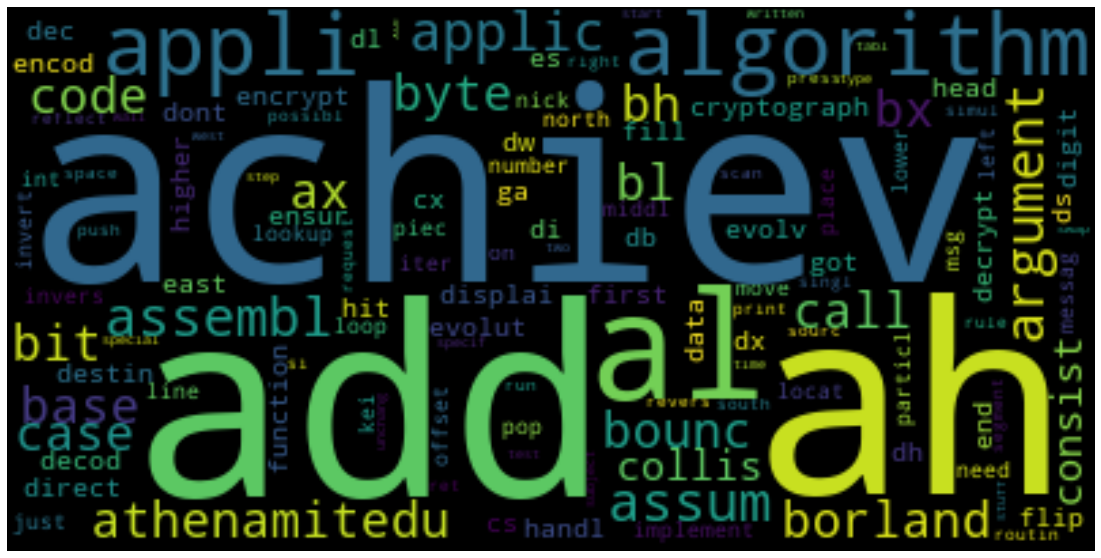


Cluster  1 size = 1181
----------------------------------------------
         Term    DF      Freq  Percentage of Docs
7895  subject  1181  0.600339            1.000000
9129    write   753  0.678239            0.637595
417    articl   578  1.091448            0.489416
5795       on   569  0.532599            0.481795
8203    think   419  0.555461            0.354784
4319     just   407  1.029636            0.344623
4449     know   405  0.606266            0.342930
3266      get   386  0.839966            0.326842
3339       go   373  0.629128            0.315834
6049    peopl   365  0.597798            0.309060


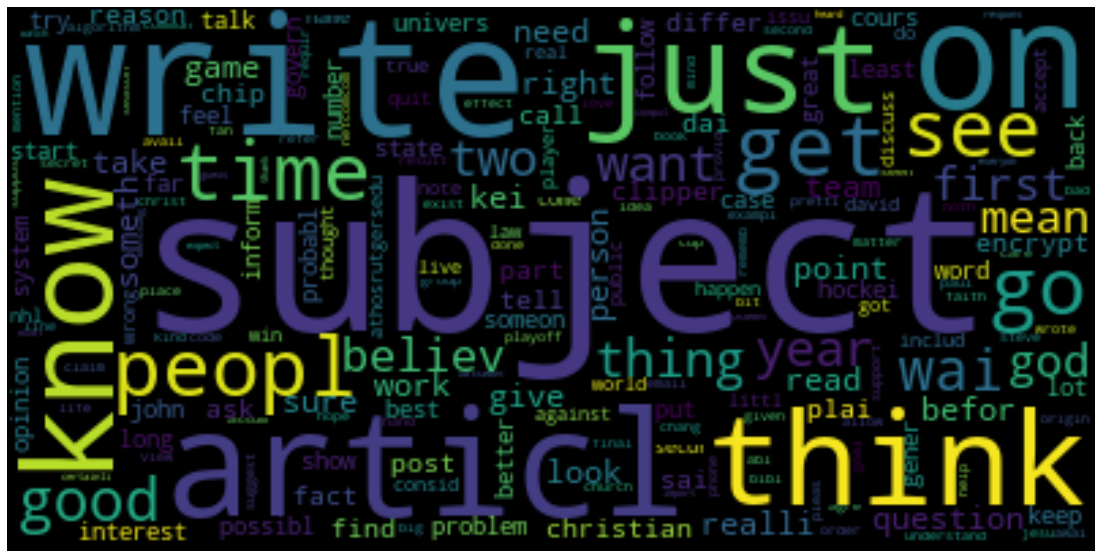


Cluster  2 size = 805
----------------------------------------------
         Term   DF      Freq  Percentage of Docs
7895  subject  805  0.325466            1.000000
9025   window  295  0.404969            0.366460
8174    thank  233  0.344099            0.289441
2550    email  231  1.052174            0.286957
7115     sale  227  0.454658            0.281988
6207    pleas  222  0.349068            0.275776
9129    write  206  0.368944            0.255901
5795       on  202  0.306832            0.250932
3266      get  193  1.085714            0.239752
9084     work  186  0.365217            0.231056


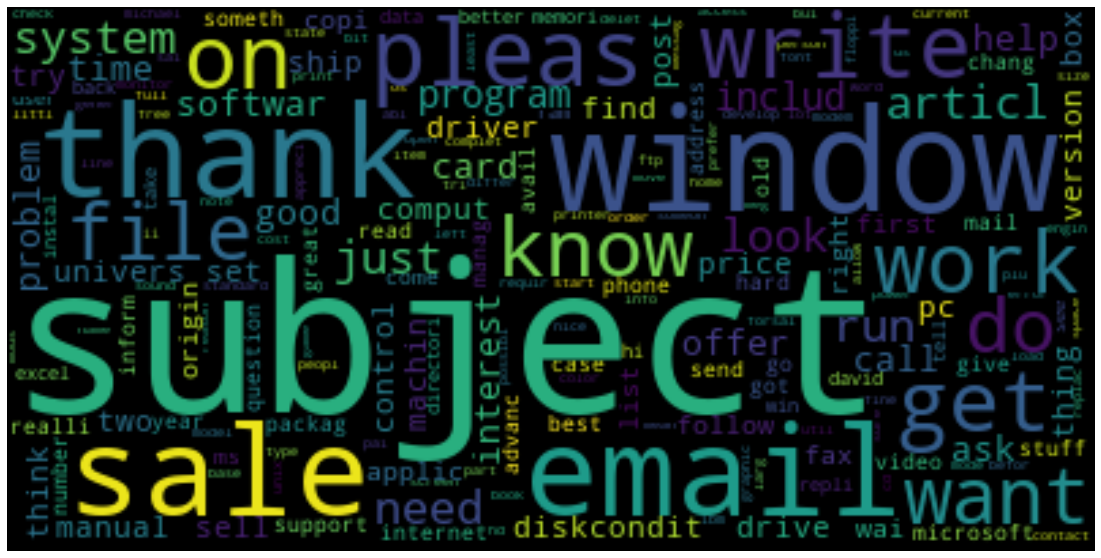


Cluster  3 size = 6
----------------------------------------------
              Term  DF       Freq  Percentage of Docs
442            asq   6   1.000000                 1.0
443           asqq   6   8.666667                 1.0
802             bj   6   7.666667                 1.0
1052           bxn   6  29.833333                 1.0
3302           giz   6   3.666667                 1.0
5676          nrhj   6   6.000000                 1.0
5680          nriz   6   7.833333                 1.0
5975          part   6   2.000000                 1.0
7116  salmonusdedu   6   5.000000                 1.0
8275            tm   6  22.000000                 1.0


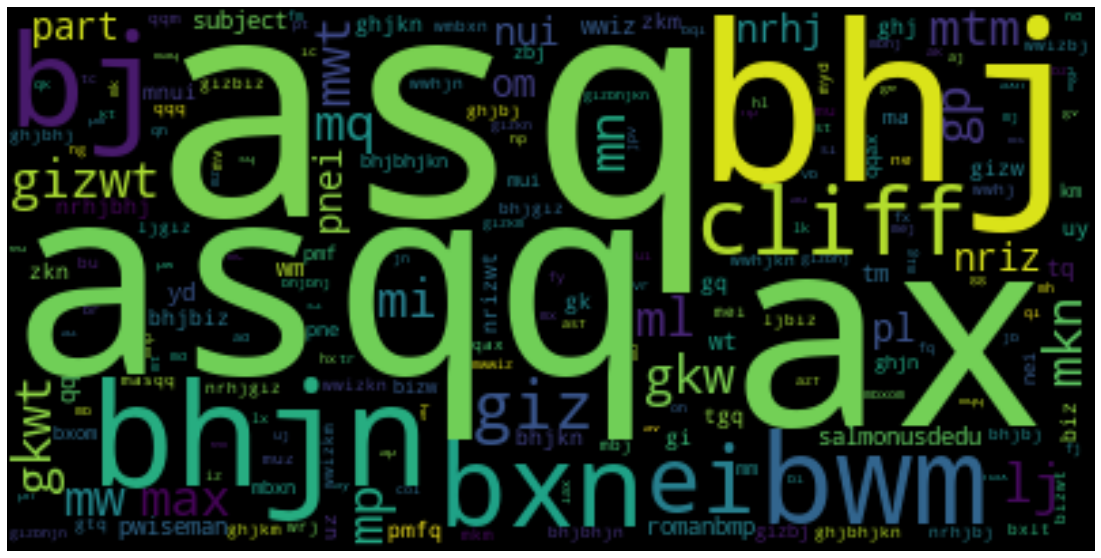


Cluster  4 size = 7
----------------------------------------------
         Term  DF      Freq  Percentage of Docs
7895  subject   7  2.857143            1.000000
2508       ei   6  1.142857            0.857143
4835       ma   6  2.714286            0.857143
5125       mi   6  1.714286            0.857143
5245       mm   6  1.428571            0.857143
5256       mo   6  8.428571            0.857143
5349       mq   6  7.714286            0.857143
5426       mw   6  6.714286            0.857143
5565       ng   6  6.714286            0.857143
9140       ws   6  4.857143            0.857143


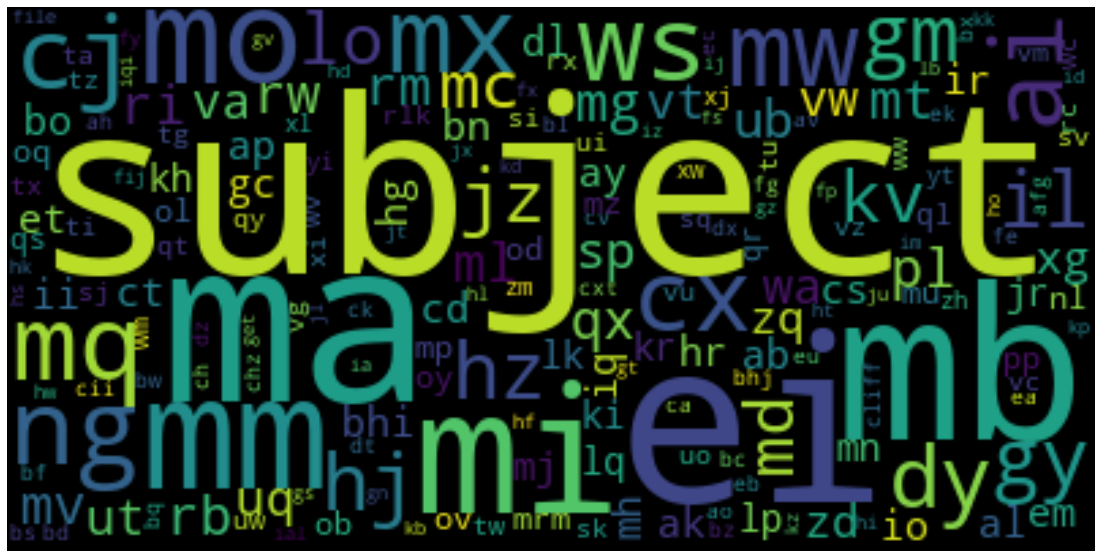

In [25]:
print('Top N terms and word cloud for each cluster')
display_clusters(X_train, clusters, term_centroids, feature_names, 10)

#### Section d)
##### Completeness and Homogeneity values

In [35]:
from sklearn.metrics import completeness_score, homogeneity_score
print('Completeness metric of a cluster')
print(completeness_score(np.array(y_train.values.flatten()),newC))

Completeness metric of a cluster
0.6586015692828537


A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. If the value is 1, its a perfect cluster

In [36]:
print('Completeness metric of a cluster')
print(homogeneity_score(np.array(y_train.values.flatten()),newC))

Completeness metric of a cluster
0.2940072321371934


A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

#### Section e)
##### Cluster Assignments: Class Labels
Function to assign class labels based on cosine similarity

In [28]:
def cosine_sim(x, D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    #dists = 1 - sims
    idx = np.argsort(-sims) # sorting
    #print (idx)
    return str(idx[:1]).lstrip('[').rstrip(']'),np.max(sims)
       

Function returns the class labels and similarity distance associated with each record

In [29]:
def cluster_label(test_set, train_set, train_class, test_class):
    numTestVecs = len(test_class)
    accCount = 0.0
    arr = []
    arr_sim = []
    for i in range(numTestVecs):
        index, sim = cosine_sim(test_set[i,:], train_set) # Setting the value of k to 1 and reusing the previous classifier model
        #classifierResult = train_class[index]
        #print(train_class[index])
        #print(str(train_class[index]).lstrip('[').rstrip(']'))
        arr.append(int(index))
        arr_sim.append(sim)
        #test_set.loc[test_set.index[i], 'Cluster Label'] = train_class[index]
        #if (classifierResult == test_class[i]):
            #accCount += 1.0
    #print("Total accuracy rate:", accCount/float(numTestVecs) ,'\n')
    newArray = np.array(arr)
    newArray2 = np.array(arr_sim)
    #print(pd.DataFrame(newArray).head(10))
    test_set = np.column_stack((test_set,newArray))
    test_set = np.column_stack((test_set,newArray2))
    #print(pd.DataFrame(test_set))
    #return test_set
    return test_set

In [30]:
X_test = np.array(X_test)
train_cl = np.array(term_centroids.index)
term_centroid = np.array(term_centroids)
y_test = np.array(y_test)
tclass = cluster_label(X_test, term_centroid, train_cl , y_test)

In [31]:
tfinal = pd.DataFrame(tclass)

In [32]:
cname = np.array(feature_names[0])
cname_add_label =np.array('Class_Label')
cname_distance = np.array('Cosine_Similarity')
cname = np.hstack((cname,cname_add_label))
cname = np.hstack((cname,cname_distance))
cname

array(['aa', 'aargh', 'aaron', ..., 'zz', 'Class_Label',
       'Cosine_Similarity'], dtype=object)

In [33]:
tfinal.columns = cname

In [34]:
tfinal.head(10)

aa  aargh  aaron  aaronc   ab  abandon  abc  abid  abil  abl  abomin  \
0  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
1  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
2  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
3  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
4  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
5  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
6  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
7  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
8  0.0    0.0    2.0     2.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   
9  0.0    0.0    0.0     0.0  0.0      0.0  0.0   0.0   0.0  0.0     0.0   

   abort  abound  abraham  abridg  abroad  absenc  absent  absolut  abstain  \
0    0.0     0.0      0.0     0.0     0.0     0.0     0.0      1.0      0.0   
1    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
2    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
3    0.0     0.0      0.0     0.0     0.0     0.0     0.0      1.0      0.0   
4    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
5    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
6    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
7    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
8    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   
9    0.0     0.0      0.0     0.0     0.0     0.0     0.0      0.0      0.0   

   abstin  abstract  absurd  abund  abus   ac  academ  academi  academia  \
0     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
1     0.0       0.0     0.0    0.0   1.0  0.0     0.0      0.0       0.0   
2     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
3     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
4     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
5     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
6     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
7     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
8     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   
9     0.0       0.0     0.0    0.0   0.0  0.0     0.0      0.0       0.0   

   acceler  acceller  accept  access  accessdigexcom  accessdigexnet  \
0      0.0       0.0     0.0     0.0             0.0             0.0   
1      0.0       0.0     1.0     0.0             0.0             0.0   
2      0.0       0.0     0.0     0.0             0.0             0.0   
3      0.0       0.0     0.0     0.0             0.0             0.0   
4      0.0       0.0     0.0     0.0             0.0             0.0   
5      0.0       0.0     0.0     1.0             0.0             0.0   
6      0.0       0.0     0.0     0.0             0.0             0.0   
7      0.0       0.0     0.0     0.0             0.0             0.0   
8      0.0       0.0     4.0     0.0             0.0             0.0   
9      0.0       0.0     0.0     0.0             0.0             0.0   

   accessori  accid  accommod  accomod  accompani  accompli  accomplish  \
0        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
1        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
2        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
3        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
4        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
5        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
6        0.0    0.0       0.0      0.0        0.0       0.0         0.0   
7        0.0    0.0       0.0      0.0        0.0       0.0        

In [39]:
tfinal[['Class_Label','Cosine_Similarity']]

Class_Label  Cosine_Similarity
0            1.0           0.202241
1            1.0           0.200755
2            2.0           0.158770
3            2.0           0.394885
4            2.0           0.169046
5            1.0           0.387701
6            1.0           0.370064
7            1.0           0.180807
8            1.0           0.410035
9            1.0           0.161230
10           1.0           0.191250
11           2.0           0.183508
12           2.0           0.334015
13           2.0           0.165947
14           2.0           0.222476
15           2.0           0.236305
16           1.0           0.357695
17           1.0           0.236343
18           1.0           0.189262
19           2.0           0.416964
20           1.0           0.287457
21           1.0           0.244811
22           2.0           0.219454
23           2.0           0.217372
24           1.0           0.294607
25           2.0           0.165528
26           1.0           0.277361
27           1.0           0.188300
28           2.0           0.205295
29           1.0           0.229094
30           2.0           0.260122
31           1.0           0.406575
32           1.0           0.332276
33           2.0           0.163647
34           2.0           0.382496
35           2.0           0.184451
36           1.0           0.139097
37           1.0           0.191500
38           1.0           0.211228
39           1.0           0.274633
40           1.0           0.203132
41           1.0           0.115678
42           2.0           0.445607
43           1.0           0.169052
44           1.0           0.237893
45           2.0           0.243173
46           1.0           0.175954
47           2.0           0.234762
48           1.0           0.222789
49           2.0           0.339713
50           2.0           0.248315
51           1.0           0.270276
52           2.0           0.239599
53           1.0           0.146331
54           1.0           0.196428
55           2.0           0.128688
56           2.0           0.319725
57           1.0           0.251767
58           2.0           0.170262
59           2.0           0.241659
60           2.0           0.197056
61           2.0           0.194303
62           1.0           0.260550
63           2.0           0.383180
64           2.0           0.262555
65           1.0           0.294618
66           2.0           0.208563
67           1.0           0.162423
68           1.0           0.173065
69           1.0           0.244116
70           2.0           0.227615
71           1.0           0.391370
72           2.0           0.154034
73           1.0           0.122114
74           2.0           0.259723
75           1.0           0.259101
76           1.0           0.249589
77           1.0           0.274607
78           1.0           0.393431
79           2.0           0.176564
80           1.0           0.273615
81           1.0           0.188317
82           2.0           0.174173
83           2.0           0.153015
84           2.0           0.213183
85           2.0           0.172130
86           1.0           0.235847
87           1.0           0.245198
88           1.0           0.273145
89           2.0           0.417731
90           1.0           0.183104
91           1.0           0.316758
92           1.0           0.325950
93           2.0           0.280143
94           1.0           0.288680
95           2.0           0.325898
96           1.0           0.247201
97           1.0           0.212033
98           1.0           0.228375
99           2.0           0.131046
100          1.0           0.053454
101          1.0           0.230390
102          2.0           0.171722
103          2.0           0.216387
104          1.0           0.351642
105          1.0           0.302972
106          1.0           0.199013
107          1.0           0.139145
108          1.0           0.278099
109          1.0           0.230748
110      

The above cell shows the class label and cosine similarity distance for each record.

Class_label and Cosine_Similarity are last two columns in the above dataframe.